## Start

In [79]:
import os

base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
folders=os.listdir(train_dir)

## Image Data Generator

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,  # Normalisasi pixel ke rentang [0,1]
#     rotation_range=20,  # Rotasi gambar hingga 20 derajat
#     width_shift_range=0.2,  # Perpindahan horizontal hingga 20%
#     height_shift_range=0.2,  # Perpindahan vertikal hingga 20%
#     shear_range=0.2,  # Transformasi shearing
#     zoom_range=0.2,  # Zoom in/out gambar
#     horizontal_flip=True,  # Membalik gambar secara horizontal
#     fill_mode='nearest'  # Mode pengisian piksel
# )

val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    # shuffle=True
    )
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    # shuffle=False
    )

Found 25 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


## Deep Learning Model

![Deep Learning Model](../image/deep_learning_model.png)

In [81]:
from tensorflow.keras import layers, optimizers, Model
# Bapak
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(50, activation='sigmoid')(x)

output = layers.Dense(5, activation='relu')(x)

model = Model(img_input, output)
# Optimizer dengan learning rate 0.001
optimizer = optimizers.SGD(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['acc'])

# medium
# Input layer
# img_input = layers.Input(shape=(150, 150, 3))

# # Conv Block 1
# x = layers.Conv2D(32, 3, activation='relu', padding='same')(img_input)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(2)(x)

# # Conv Block 2
# x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(2)(x)

# # Conv Block 3
# x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
# x = layers.BatchNormalization()(x)
# x = layers.MaxPooling2D(2)(x)

# # Flatten and Fully Connected Layers
# x = layers.Flatten()(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)  # Dropout to reduce overfitting
# x = layers.Dense(64, activation='relu')(x)

# # Output layer
# output = layers.Dense(5, activation='softmax')(x)  # Softmax for classification

# # Model
# model = Model(img_input, output)

# # Optimizer and Compile
# optimizer = optimizers.Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

# sendiri
# import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# model = tf.keras.models.Sequential([
#     Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
#     MaxPooling2D(2,2),
#     Conv2D(64,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(512,(3,3),activation='relu'),
#     MaxPooling2D(2,2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(5, activation='softmax') # 5 classes output
# ])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │     2,073,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,078,993 (7.93 MB)

 Trainable params: 2,078,993 (7.93 MB)

 Non-trainable params: 0 (0.00 B)

## Visualising the model

/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


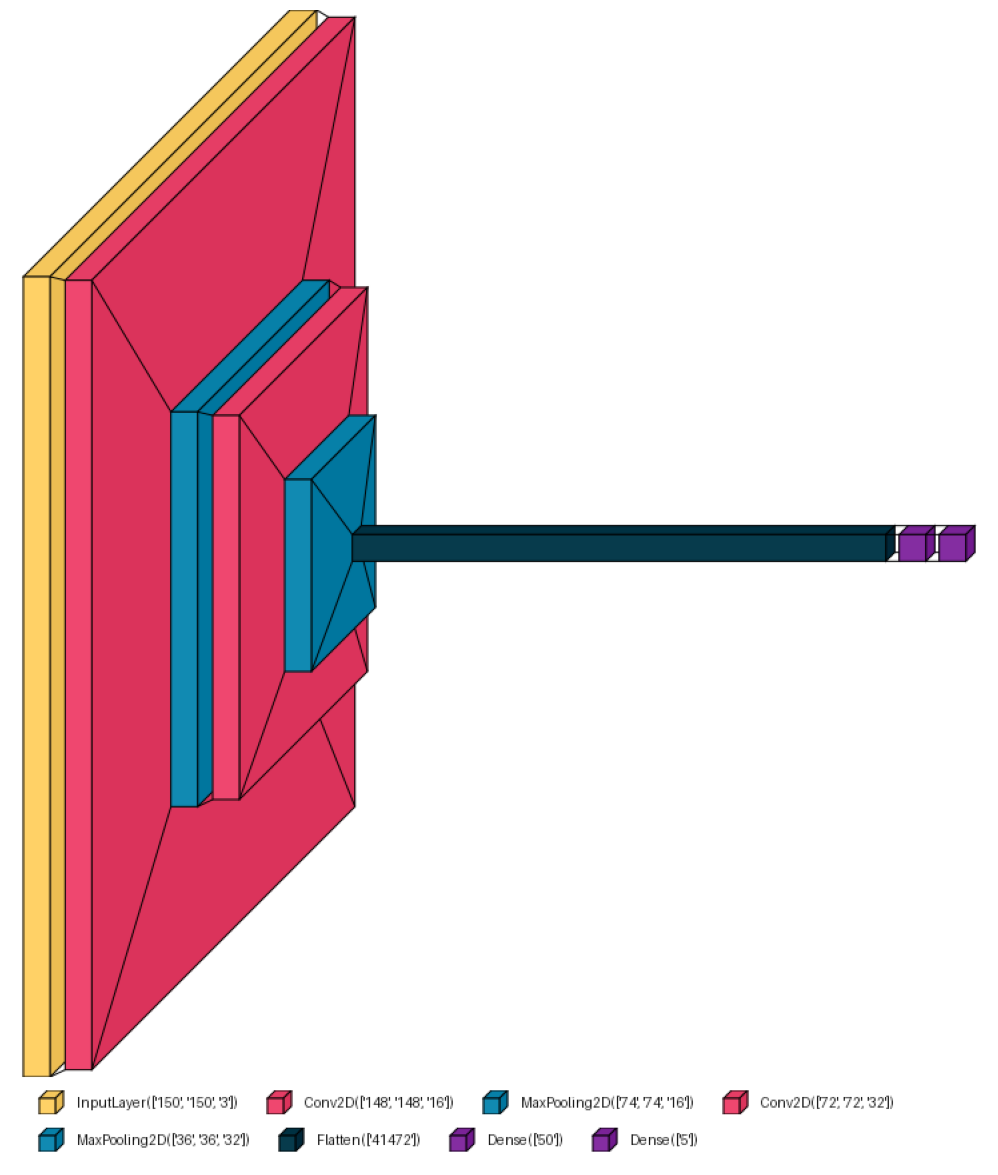

In [82]:
import visualkeras
import matplotlib.pyplot as plt

img_mode = visualkeras.layered_view(model, legend=True, show_dimension=True)
# Display the image inline using matplotlib
plt.figure(figsize=(15, 15))  # Increase the size here
plt.imshow(img_mode)
plt.axis('off')  # Turn off the axis for a cleaner output
plt.show()

## Fit Generator

In [83]:
# sendiri
# history = model.fit(

#     train_generator,
#     # steps_per_epoch=20,
#     epochs=500,
#     validation_data=validation_generator,
#     # validation_steps=10,
#     # verbose=2
#     )

# chatgpt
history = model.fit(
    train_generator,
    # steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    # validation_steps=len(validation_generator),
    epochs=250  # Jumlah epoch yang diinginkan
)

Epoch 1/250


/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - acc: 0.1750 - loss: 0.3963 - val_acc: 0.2000 - val_loss: 0.3699
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.2167 - loss: 0.3647 - val_acc: 0.2000 - val_loss: 0.3483
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.1704 - loss: 0.3503 - val_acc: 0.2000 - val_loss: 0.3292
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.1750 - loss: 0.3357 - val_acc: 0.2000 - val_loss: 0.3123
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.1750 - loss: 0.3219 - val_acc: 0.2000 - val_loss: 0.2975
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.1958 - loss: 0.3033 - val_acc: 0.2000 - val_loss: 0.2834
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.2074 - loss: 0.2843 - val_acc: 0.2000 - val_loss: 0.2705
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.1750 - loss: 0.2782 - val_acc: 0.2000 - val_loss: 0.2590
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.1750 - loss: 0.2616 - val_a

## Accuracy & Loss

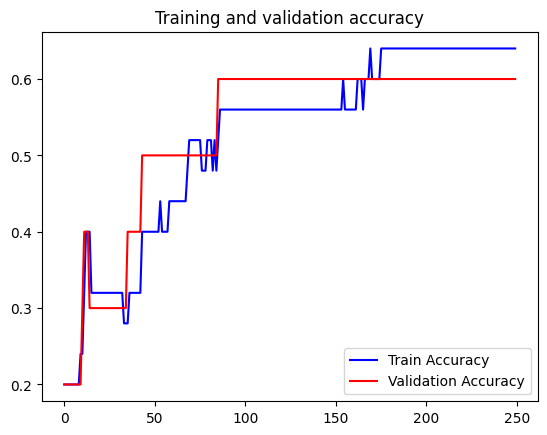

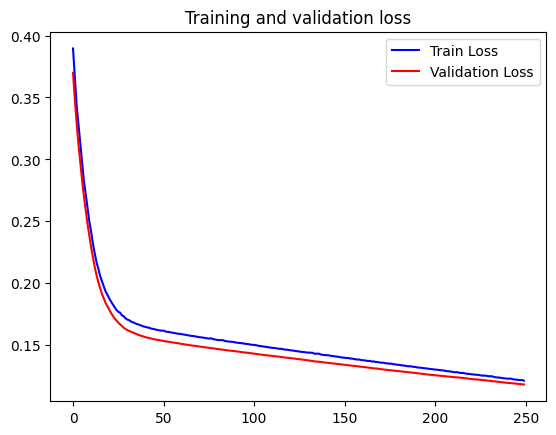

In [84]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


## Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


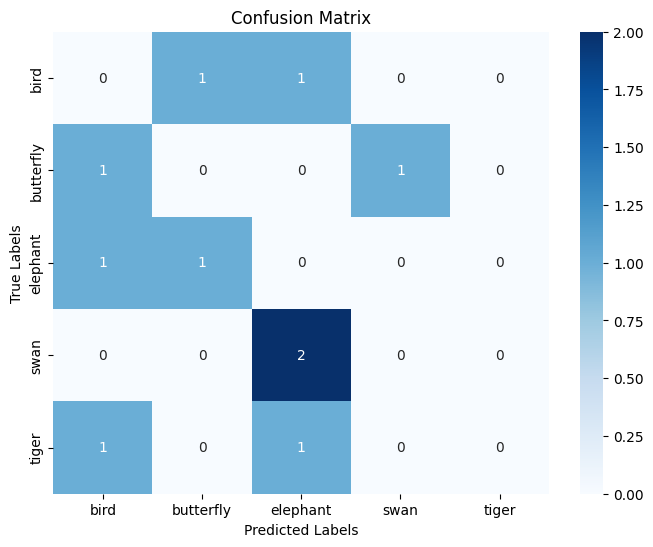

Classification Report:

              precision    recall  f1-score   support

        bird       0.00      0.00      0.00       2.0
   butterfly       0.00      0.00      0.00       2.0
    elephant       0.00      0.00      0.00       2.0
        swan       0.00      0.00      0.00       2.0
       tiger       0.00      0.00      0.00       2.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [95]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil label sebenarnya dan prediksi
validation_generator.reset()  # Pastikan generator dimulai dari awal
y_true = validation_generator.classes  # Label sebenarnya

# Mendapatkan prediksi dari model
y_pred_probs = model.predict(validation_generator, steps=len(validation_generator), verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)  # Konversi probabilitas ke kelas

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Label kelas (berdasarkan urutan direktori dalam generator)
class_labels = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


## Testing Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Nilai Output Units:
 [[0.5194945 0.        0.        0.        0.       ]]


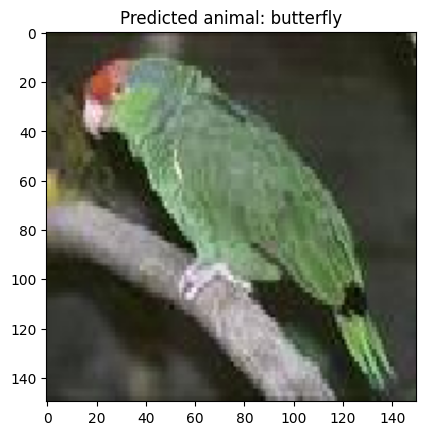

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Nilai Output Units:
 [[1.1404558  0.         0.00346963 0.         0.        ]]


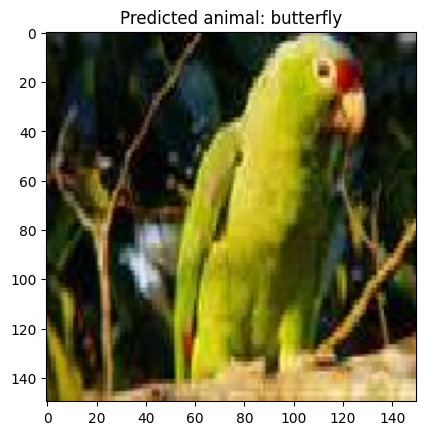

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Nilai Output Units:
 [[0.04936037 0.         0.         0.23795922 0.        ]]


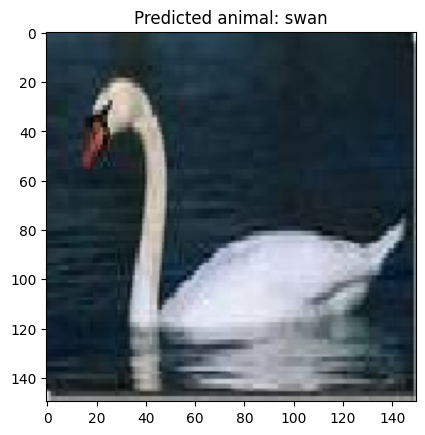

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nilai Output Units:
 [[0.25175145 0.         0.         0.         0.        ]]


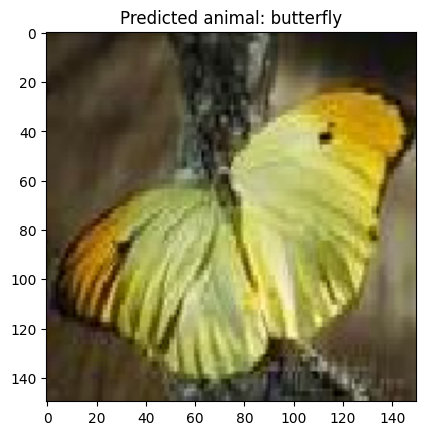

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nilai Output Units:
 [[0.8867649 0.        0.9782271 0.        0.       ]]


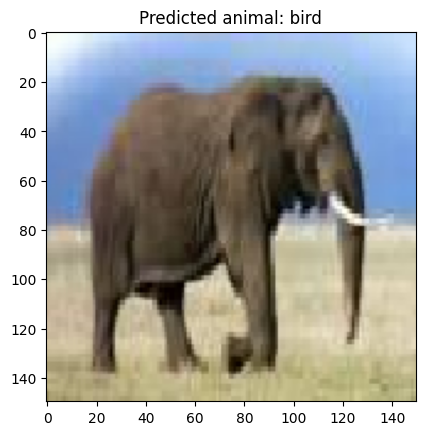

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nilai Output Units:
 [[0.5999005  0.         0.67109674 0.         0.        ]]


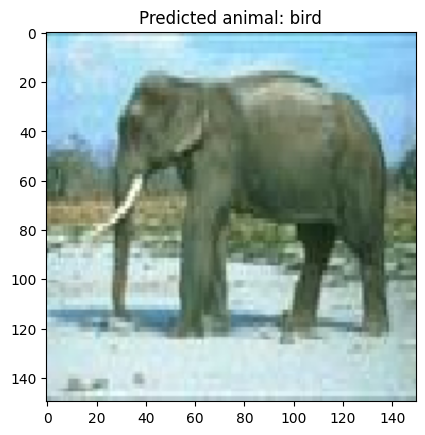

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 0.]]


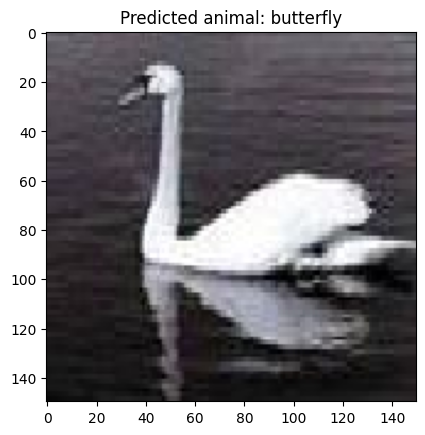

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nilai Output Units:
 [[0. 0. 0. 0. 0.]]


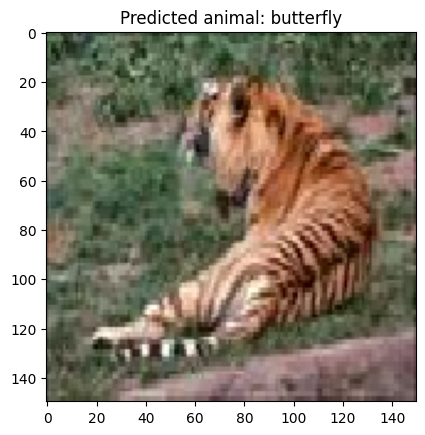

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Nilai Output Units:
 [[0.19645622 0.         0.         0.         0.        ]]


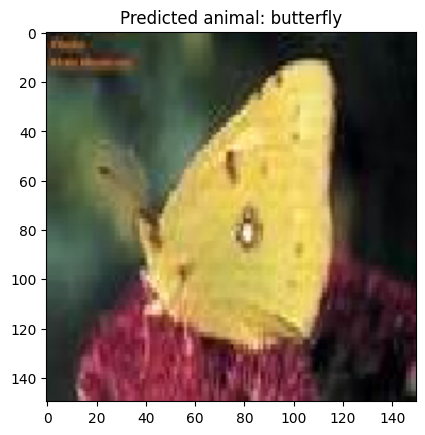

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Nilai Output Units:
 [[0.28757125 0.         0.         0.         0.        ]]


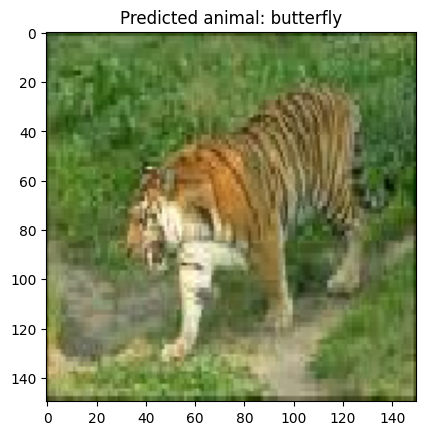

############################################


In [96]:
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf

for filename in os.listdir(test_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        preds = model.predict(x)
        print("Nilai Output Units:\n", preds)
        index_preds = np.argmax(preds)
        img_print = image.load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(150, 150))
        plt.imshow(img_print)
        plt.title(f'Predicted animal: {folders[index_preds]}')
        plt.show()
        print("############################################")